Module Import

In [20]:
from tensorflow import keras

Load MNIST DataSet


In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [22]:
for i in range(5):
  print(y_train[i])

5
0
4
1
9


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

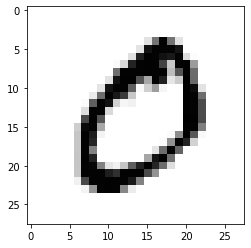

In [23]:
import matplotlib.pyplot as plt

image_index = 1 # You may select anything up to 60,000

print(x_train[image_index], "\n\n") # The label is 0
print(x_test[image_index], "\n\n") # The label is 2

print(y_train[image_index], "\n\n")
print(y_test[image_index], "\n\n")

print("x_train", x_train.shape, "x_test", x_test.shape, "리스트(배열,행렬)\n\n")
print("y_train", y_train.shape, "y_test", y_test.shape, "리스트(배열,행렬)\n\n")


plt.imshow(x_train[image_index], cmap='Greys')



one-hot enconding 수행<br>
5 --> 0 0 0 0 0 1 0 0 0 0<br>
1 --> 0 1 0 0 0 0 0 0 0 0<br>


In [24]:
y_train = keras.utils.to_categorical(y=y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y=y_test, num_classes=10)

for j in range(5):
  print("=====Y Train Value======", y_train[j])

for k in range(5):
  print("=====Y Test Value======", y_test[k])

=====Y Train Value====== [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
=====Y Train Value====== [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
=====Y Train Value====== [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
=====Y Train Value====== [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
=====Y Train Value====== [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
=====Y Test Value====== [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
=====Y Test Value====== [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
=====Y Test Value====== [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
=====Y Test Value====== [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
=====Y Test Value====== [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Reshaping DataSet


In [25]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


모델 구조 생성


In [26]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, activation="sigmoid", input_shape=(28*28,)))
model.add(keras.layers.Dense(32, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="sigmoid"))

모델구성요소 컴파일 및 구조보기

In [27]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


모델훈련


In [28]:
hist=model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 1.7942 - accuracy: 0.5357 - val_loss: 0.8549 - val_accuracy: 0.8157
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.7801 - accuracy: 0.8144 - val_loss: 0.6415 - val_accuracy: 0.8298
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5998 - accuracy: 0.8386 - val_loss: 0.5293 - val_accuracy: 0.8572
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.8427 - val_loss: 0.5249 - val_accuracy: 0.8425
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5114 - accuracy: 0.8473 - val_loss: 0.4969 - val_accuracy: 0.8516
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5053 - accuracy: 0.8509 - val_loss: 0.4663 - val_accuracy: 0.8639
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4818 - accuracy: 0.8544 - val_loss: 0.4570 - val_accuracy: 0.8587

생성된 모델을 이용한 추론(평가, 예측)


In [29]:
model.evaluate(x_test, y_test )

313/313 [==============================] - 0s 1ms/step - loss: 0.2710 - accuracy: 0.9190


[0.2710105776786804, 0.9190000295639038]

모델 바이러리(Weight) 저장

In [30]:
model.save("MNIST-Keras-101-Sample-JSH.h5")
model.save_weights("MNIST-Keras-101-Sample-JSH")

모델 수행 그래프보기

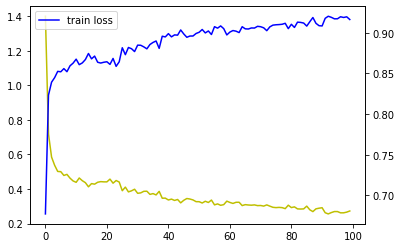

In [31]:
import matplotlib
import matplotlib.pyplot as plt

fig, loss_ax =  plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
#loss_ax.plot(hist.history['val_loss'], 'g', label='validation loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
#acc_ax.plot(hist.history['val_accuracy'], 'r', label='validation accuracy')

plt.legend(['train loss', 'train accuracy'])
#plt.legend(['train loss', 'train accuracy', 'validation loss', 'validation accuracy'])
plt.show()